In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
import cv2
from skimage import graph

D:\Software\Anaconda\envs\MachineLearning\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


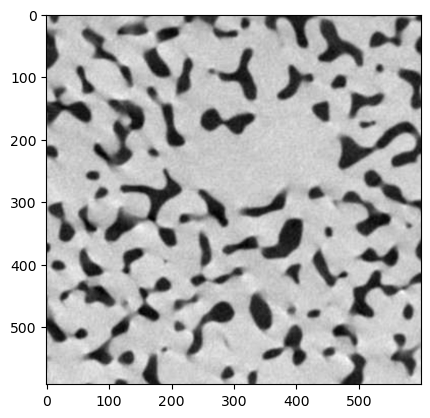

In [2]:
img = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE)
#img = img.astype('uint8')
#img = img / img.max()
img_color = cv2.imread('test.png')
plt.imshow(img,'gray')

In [3]:
#Watershed and graph nomalized cut
gradient = skimage.filters.sobel(img)
labels = skimage.segmentation.watershed(gradient, markers=1000, compactness=0.001)
g = skimage.graph.rag_mean_color(img, labels, mode='similarity',connectivity= 2 )
#skimage.graph.show_rag(labels, g, img_color)
labels2 = skimage.graph.cut_normalized(labels, g)
#labels2 = skimage.graph.cut_threshold(felzenszwalb, g, 0.01)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)


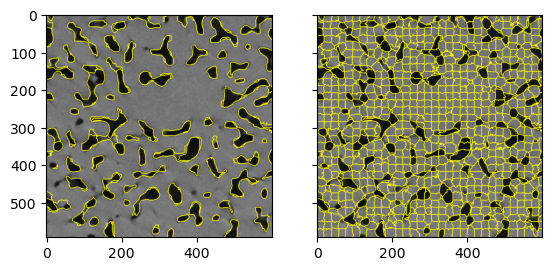

In [14]:
fig, ax = plt.subplots(1, 2,sharey=True)
ax[0].imshow((skimage.segmentation.mark_boundaries(img_color[:,:,0], (out2[:,:,0]*100).astype('uint8'))))
ax[1].imshow((skimage.segmentation.mark_boundaries(img_color[:,:,0], labels)))

In [15]:
# SLIC and graph nomalized cut
gradient = skimage.filters.sobel(img)
labels = skimage.segmentation.slic(img_color, n_segments=1000, compactness=10, sigma=1, start_label=1)
g = skimage.graph.rag_mean_color(img, labels, mode='similarity',connectivity= 2 )
labels2 = skimage.graph.cut_normalized(labels, g)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

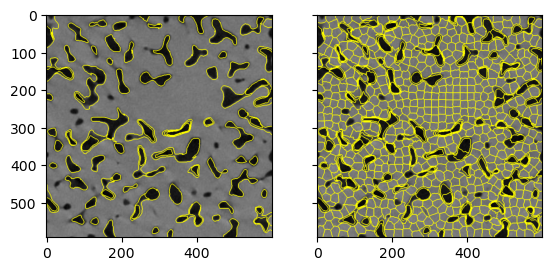

In [16]:
fig, ax = plt.subplots(1, 2,sharey=True)
ax[0].imshow((skimage.segmentation.mark_boundaries(img_color[:,:,0], (out2[:,:,0]*100).astype('uint8'))))
ax[1].imshow((skimage.segmentation.mark_boundaries(img_color[:,:,0], labels)))

In [40]:
# Quick shift and graph nomalized cut
gradient = skimage.filters.sobel(img)
labels = skimage.segmentation.quickshift(img_color, kernel_size=4, max_dist=8, ratio=0.5)
g = skimage.graph.rag_mean_color(img, labels, mode='similarity',connectivity= 2 )
labels2 = skimage.graph.cut_normalized(labels, g)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

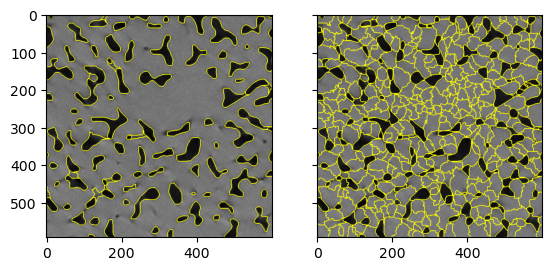

In [41]:
fig, ax = plt.subplots(1, 2,sharey=True)
ax[0].imshow((skimage.segmentation.mark_boundaries(img_color[:,:,0], (out2[:,:,0]*100).astype('uint8'))))
ax[1].imshow((skimage.segmentation.mark_boundaries(img_color[:,:,0], labels)))

In [19]:
# felzenszwalb and graph nomalized cut
gradient = skimage.filters.sobel(img)
labels = seg.felzenszwalb(img, min_size=10,scale=100)
g = skimage.graph.rag_mean_color(img, labels, mode='similarity',connectivity= 2 )
labels2 = skimage.graph.cut_normalized(labels, g)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

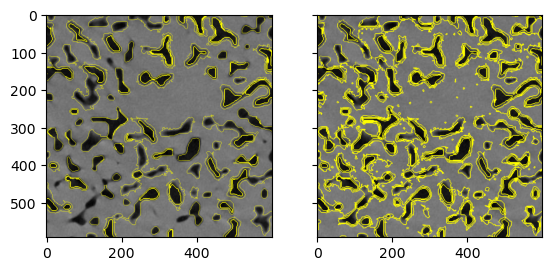

In [20]:
fig, ax = plt.subplots(1, 2,sharey=True)
ax[0].imshow((skimage.segmentation.mark_boundaries(img_color[:,:,0], (out2[:,:,0]*100).astype('uint8'))))
ax[1].imshow((skimage.segmentation.mark_boundaries(img_color[:,:,0], labels)))

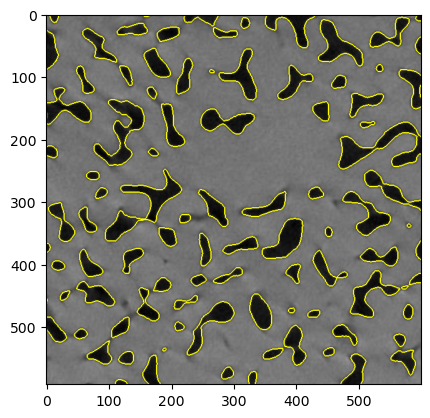

In [95]:
#random_walker segmentation
mask = np.zeros_like(img)
mask [img > 60] = 1
labels =skimage.segmentation.random_walker(img,mask, mode='bf', beta=0.1)
plt.imshow(skimage.segmentation.mark_boundaries(img,labels))

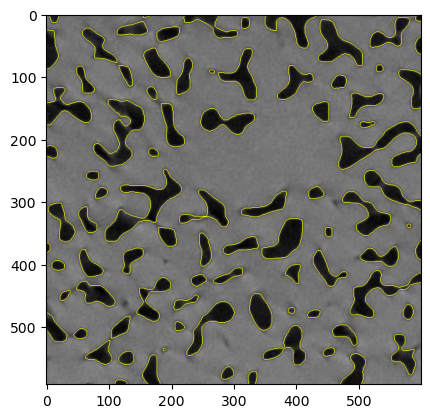

In [23]:
#Chan-Vese Segmentation
cv = skimage.segmentation.chan_vese(img, mu=0.25, lambda1=1, lambda2=1, tol=1e-3,
               max_num_iter=200, dt=0.5, init_level_set="checkerboard",
               extended_output=True)
plt.imshow(skimage.segmentation.mark_boundaries(img,cv[0]))

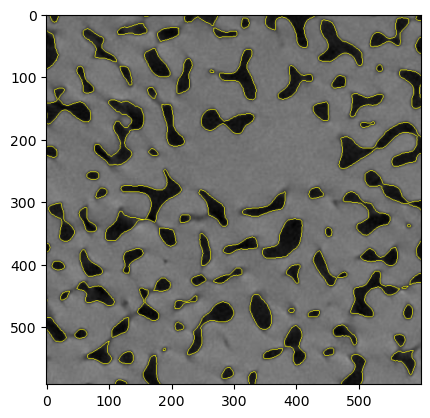

In [34]:
# Grab-cut
mask = np.zeros_like(img)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
#rect = (50,50,450,290)
#cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask[img > 60] = 1

mask, bgdModel, fgdModel = cv2.grabCut(img_color, mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
plt.imshow(skimage.segmentation.mark_boundaries(img,mask2))
